In [81]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings("ignore")

# Функции и начальные условия

In [82]:
mu = 0.012277471
eta = 1 - mu
u0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
A = lambda x, y: math.sqrt(((x+mu)**2 + y**2)**3)
B = lambda x, y: math.sqrt(((x-eta)**2 + y**2)**3)
dx = lambda x, u, y, v: u
du = lambda x, u, y, v: x + 2*v - eta*((x+mu)/A(x,y)) - mu*((x-eta)/B(x,y))
dy = lambda x, u, y, v: v
dv = lambda x, u, y, v: y - 2*u - eta*(y/A(x,y)) - mu*(y/B(x,y))
f = lambda t, u: np.array([f(u[0], u[1], u[2], u[3]) for f in [dx, du, dy, dv]])

# Метод Дормана-Принса

In [83]:
def Dormand_Prince_method(f, t, u, h):
    k1 = h * f(t, u)
    k2 = h * f(t + (1/5)*h, u + (1/5)*k1)
    k3 = h * f(t + (3/10)*h, u + (3/40)*k1 + (9/40)*k2)
    k4 = h * f(t + (4/5)*h, u + (44/45)*k1 - (56/15)*k2 + (32/9)*k3)
    k5 = h * f(t + (8/9)*h, u + (19372/6561)*k1 - (25360/2187)*k2 + (64448/6561)*k3 - (212/729)*k4)
    k6 = h * f(t + h, u + (9017/3168)*k1 - (355/33)*k2 - (46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5)
    k7 = h * f(t + h, u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6)
    u1 = u + (35/384)*k1 + (500/1113)*k3 + (125/192)*k4 - (2187/6784)*k5 + (11/84)*k6

    return u1

# Постоянный шаг по времени

In [84]:
solutions = [u0]
T = 17.0652165601579625588917206249
t = 0
time = [t]
h = 0.00001
u = u0
while(t < 2    y = y0 + h*dy0
    dy = dy0 + h*(mu*(1-dy0**2)*dy0 - y0)
    return y, dy    y = y0 + h*dy0
    dy = dy0 + h*(mu*(1-dy0**2)*dy0 - y0)
    return y, dy*T):
    u = Dormand_Prince_method(f, t, u, h)
    solutions.append(u)
    t += h
    time.append(t)

In [85]:
x = []; u1 = []; y = []; v = []
for i in solutions:
    x.append(i[0])
    u1.append(i[1])
    y.append(i[2])
    v.append(i[3])

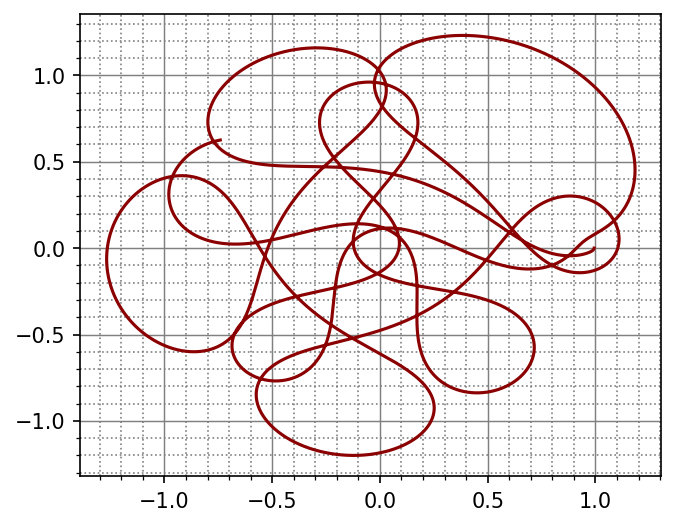

In [86]:
solutions = np.array(solutions)
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.plot(x,y, color = "darkred")
plt.minorticks_on()
plt.grid(which='major',
            color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')

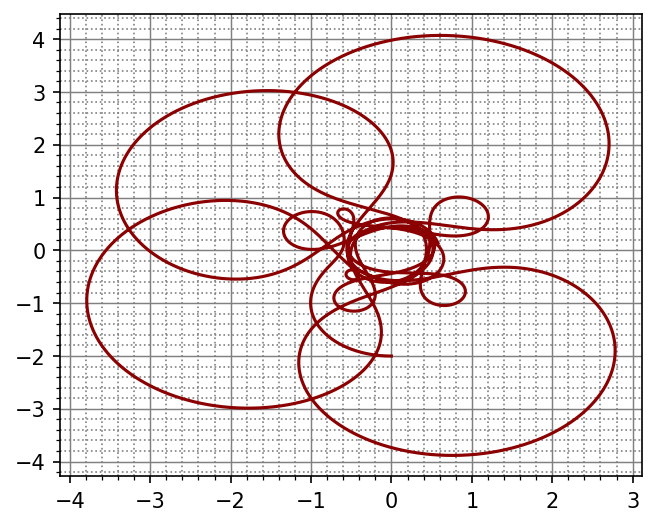

In [87]:
solutions = np.array(solutions)
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.plot(u1,v, color = "darkred")
plt.minorticks_on()
plt.grid(which='major',
            color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')

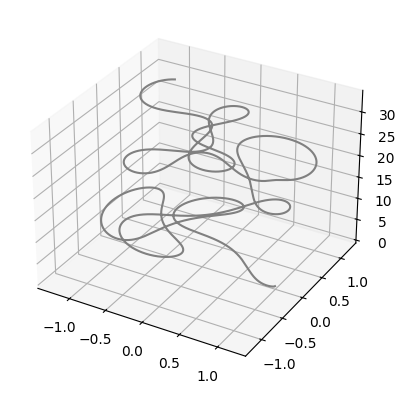

In [88]:
ax = plt.axes(projection='3d')

zline = time
xline = x
yline = y
ax.plot3D(xline, yline, zline, 'gray')